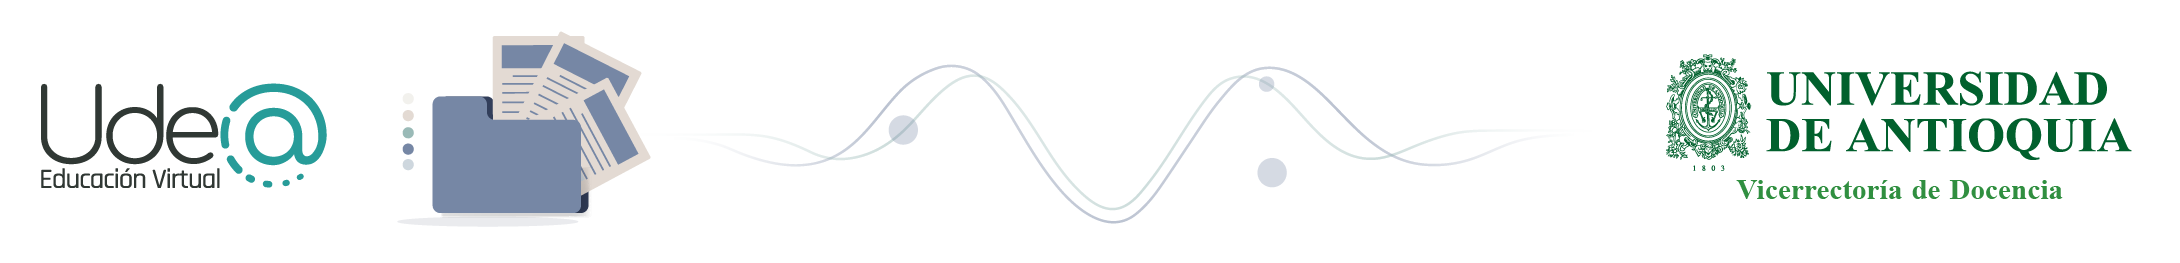

## Filtrados lineales y no lineales sobre imágenes

**Autor:** Hernán Felipe García Arias, PhD.

Universidad de Antioquia


This notebook shows some key componentens on image filtering. Please feel free to modify the filter parameters to evidence the different performances. The main functions in the skimage toolkit are located in: [skimage.filters](https://scikit-image.org/docs/dev/api/skimage.filters.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

In [ ]:
# Let's create some functions to display results

def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

def showPair(img,filt_img):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_axis_off()
    ax[1].imshow(filt_img, cmap=plt.cm.gray)
    ax[1].set_axis_off()
    plt.show()

Let's load a given sample image from the [skimage dataset](https://scikit-image.org/docs/stable/api/skimage.data.html). We will use this image to perform filtering tasks such as spatial filters and nonlinear filters

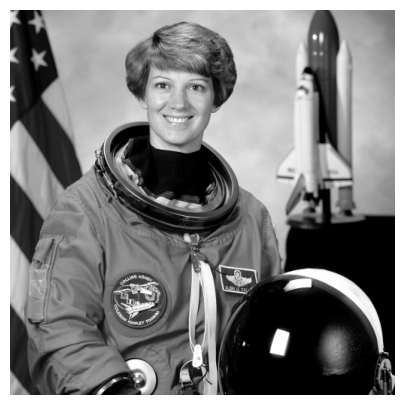

In [ ]:
img = skic.rgb2gray(skid.astronaut())
show(img)

## Spatial filtering

Let us define the discrete convolution in 2D such as

\begin{align}g[x]=f[x] * h=\sum_{\boldsymbol{\tau} \in \Omega} f[x-\boldsymbol{\tau}] h[\boldsymbol{\tau}]
\end{align}

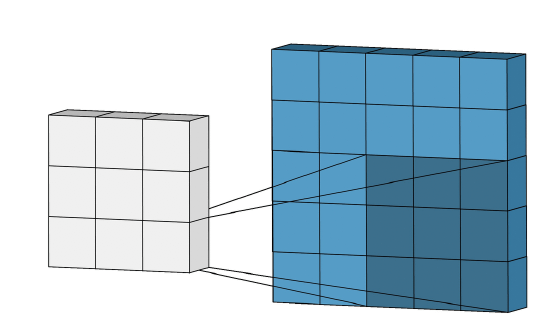

* Since discrete images a finit elemente array. The convolution kernel do no support information in their limits (edges).


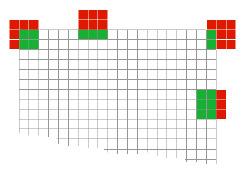

This could be overcomed by using padding information
- Ignoring borders
- Mirroring
- Envelopment

### Gaussian Filter

[Gauss filter usage](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian)

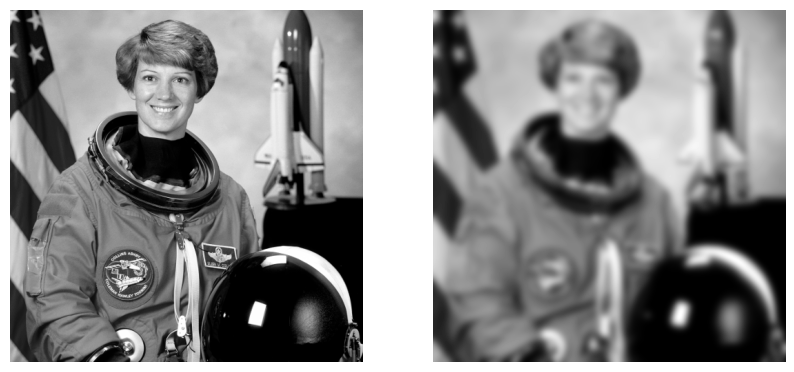

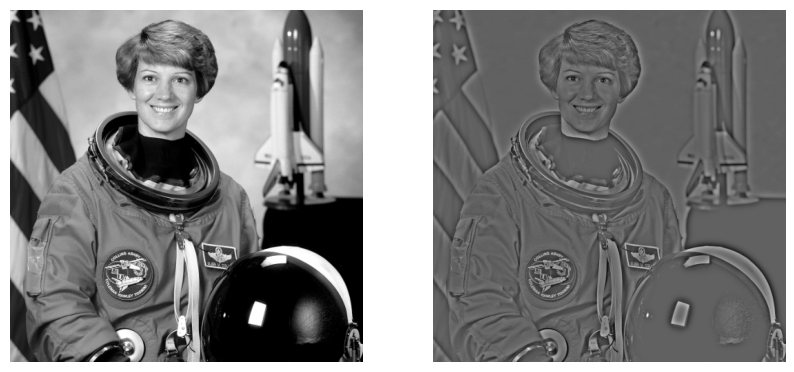

In [ ]:
import matplotlib.pyplot as plt
imgLP_Gauss = skif.gaussian(img, 5)
showPair(img,imgLP_Gauss)

imgHP_AfterSmoothing = img - imgLP_Gauss
showPair(img,imgHP_AfterSmoothing)

The above figures shows the experimental results on wich from a low-pass filtered image (upper right corner), we can notice that Gaussian kernel performs an image smoothing.

Then, by substracting the resulting image from the original we can compute an enhance image in their edges

### Sobel filter

[Sobel filter usage](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel)

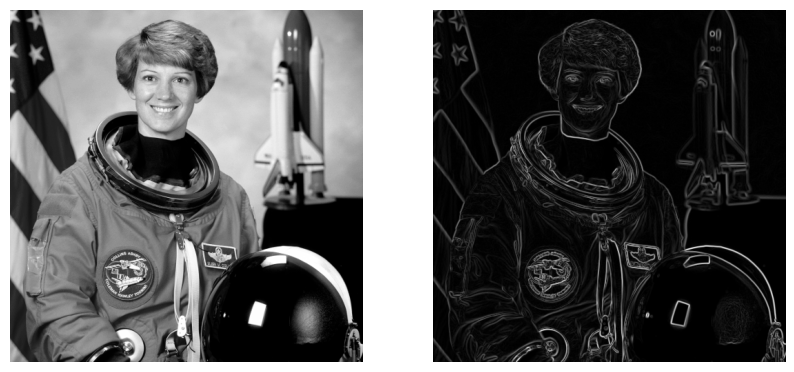

In [ ]:
sobimg = skif.sobel(img)
showPair(img,sobimg)

## High-pass filters

High-Pass Filters enhance high transition between intensity values calle *edges*. In the following interactive cell, we can show how an umbralization for a given edge value. If a low value is selected, the more edges are retained.

In [ ]:
from ipywidgets import widgets

@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(sobimg < x)

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _do…

## Noise reduction

Let's us disturb the input image with some random noise $\mathcal{N}(0,\sigma^2)$



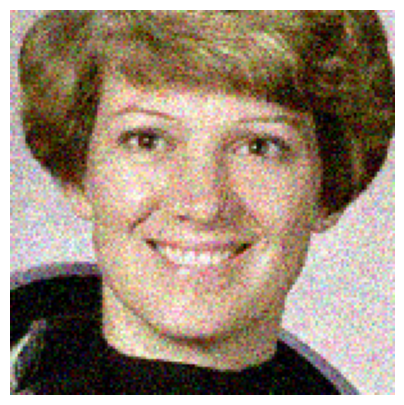

In [ ]:
img = skimage.img_as_float(skid.astronaut())

# We take a portion of the image to show the details.
img = img[50:200, 150:300]

# We add Gaussian noise.
img_n = sku.random_noise(img)
show(img_n)

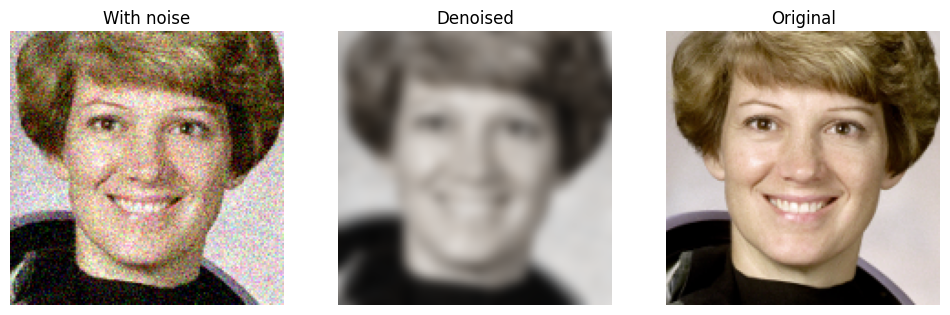

In [ ]:
img_r = skif.gaussian(img_n, 3)
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 8))

ax1.imshow(img_n)
ax1.set_title('With noise')
ax1.set_axis_off()

ax2.imshow(img_r)
ax2.set_title('Denoised')
ax2.set_axis_off()

ax3.imshow(img)
ax3.set_title('Original')
ax3.set_axis_off()



### References

1. R.R. Coifman and D.L. Donoho. “Translation-Invariant De-Noising”. Wavelets and Statistics, Lecture Notes in Statistics, vol.103. Springer, New York, 1995, pp.125-150. DOI:10.1007/978-1-4612-2544-7_9.
2. Tom Goldstein and Stanley Osher, “The Split Bregman Method For L1 Regularized Problems”, ftp://ftp.math.ucla.edu/pub/camreport/cam08-29.pdf3
3. Pascal Getreuer, “Rudin–Osher–Fatemi Total Variation Denoising using Split Bregman” in Image Processing On Line on 2012–05–19,
4. https://www.ipol.im/pub/art/2012/g-tvd/article_lr.pdf4 https://web.math.ucsb.edu/~cgarcia/UGProjects/BregmanAlgorithms_JacquelineBush.pdf